<h2 style='color:#7661B8'>SVM Model (Maquina de soporte vectorial)</h2>

SVC: Maquina de soporte vectorial de clasificación

SVR: Maquina de soporte vectorial de regresión

Es un modelo de machine learning utilizado para clasificación y regresión. Es supervisado y enpaqueta los datos para poder clasificarlos o ubicarlos en distintos subconjuntos de un espacio o plano. 

- Cuantas más clases tengamos para clasificar a nuestros datos, menos eficiente será el modelo.

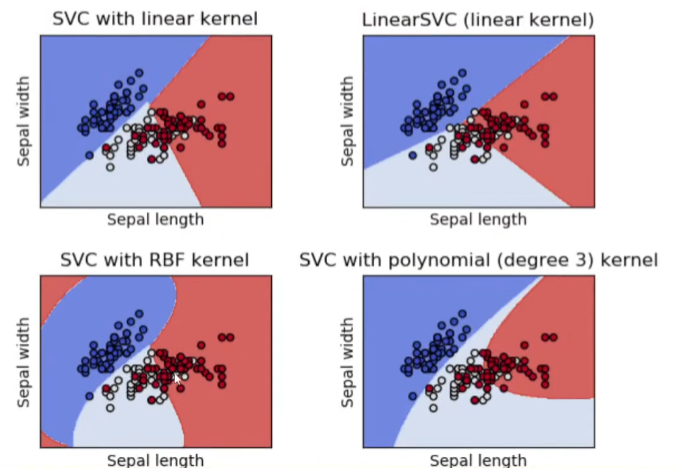

- Tenemos separaciones lineales, curvas con radio o polinomicas (Más complejas). Es nuestro trabajo entender cual puede ajustarse mejor a nuestro problema.

<h3 style='color:#34ff22'>Ventajas</h3>

- Efectivos para grandes cantidad de parametros (features)

- Son eficientes con el uso de la memoria

- Cuentan con varios metodos de separación

<h3 style='color:#6834ff'>Desventajas</h3>

- Entrenar un SVM consume demasiados recursos y tiempo. Su predicción no se basa en la probabilidad

<h2 style='color:#4fd6e8'>Algunas definiciones</h2>

Scikit-learn: Es una libreria que nos provee de modelos de machine learning

Por convención se utiliiza X en mayuscula ya que expresa una matriz con n (Features), la salida o nuestra predicción la mayoria de las veces es un escalar y se representa con y minuscula

- ravel(): Es una función de pandas que nos permite transformar una serie (Feature) en un array ndimensional, por defecto en un array de una dimensión

¿Qué valores de precisión son aceptados para nuestro modelo?

Esto mismo depende de la cantidad de clases para clasificar a nuestros datos, una precisión minima aproximada o "Aceptada" es realizar el 100% sobre la cantidad de clases a clasificar. Por ejemplo, si tenemos 3 clases, 100 / 3 => Daria una precisión minima del 33.3%. Se utiliza la regla de Laplace de probabilidad (Casos favorables / casos totales)


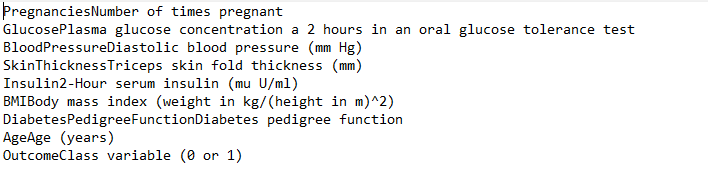

In [16]:
#Deteccion de una persona con diabetes o no

import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;

# Importamos train_test_split que sirve para dividir nuestros datos en un subconjunto de datos de entrenamiento y uno de test
from sklearn.model_selection import train_test_split;

# Importamos el modelo de maquina de soporte vectorial de clasificación
from sklearn.svm import SVC;

#Permite trabajar con  metricas de tiempo
from time import time;

#Medicion de precision del modelo
from sklearn.metrics import accuracy_score, confusion_matrix;

In [17]:
diabetes_df = pd.read_csv('../../Datasets/diabetes.csv');
diabetes_df.info();

diabetes_df.head();

#Contar la cantidad de personas que tienen diabetes y cuales no
print(diabetes_df.Outcome.value_counts());

# Matriz que contiene todo la data menos la columna Outcome (Salida)
X = diabetes_df[[
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age',
]];

y = diabetes_df[['Outcome']];

#Separar los datos con train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y);

#Cantidad de datos en cada uno de los subconjuntos
print('X_train:', X_train.shape, 'X_test:', X_test.shape);
print('y_train:', y_train.shape, 'y_test:', y_test.shape);

#Define el modelo del nucleo, como realizara la division de los subconjuntos, linear, radius, polynomial
svmc_model = SVC(kernel='linear');
svmc_model.fit(X_train.values, y_train.values.ravel())

#Generacion de predicción con datos de test
predict = svmc_model.predict(X_test);
print(predict);

#Evaluar la precisión del modelo. Lo que hace es comparar los valores originales del test (los que deben dar), con las predicciones logradas por el modelo
print("La precision del modelo es: ", accuracy_score(y_test, predict));



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
0    500
1    268
Name: Outcome, dtype: int64
X_train: (576, 8) X_test: (192, 8)
y_train: (576, 1) y_test: (192, 1)
[1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0
 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 

c:\Users\Main-PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


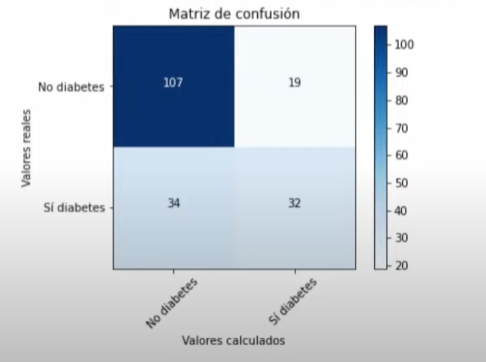

La matriz de confusión se utiliza para poder ver la efectividad/precisión de nuestro modelo y poder ir variando los parametros para mejorarlo. Los valores en cada uno de los cuadrados hacen referencia a la cantidad de valores predichos por el modelo. Por ejemplo, en el grafico, de los valores reales de pacientes que no tenian diabetes, el modelo predijo 107 que no tienen diabetes y 19 que tienen diabetes. 

Por otro lado, para el conjunto de datos que si tiene diabetes, la predicción fue que 34 no tienen y 32 si tienen.

<h2 style='color:#2ad43d'>Utilizando otros kernels de SVMC </h2>

In [18]:
#Utilizando un nucleo rbf (Radial basis function)
svcm_model2 = SVC(kernel='rbf');
svcm_model2.fit(X_train.values, y_train.values.ravel());
predict2 = svcm_model2.predict(X_test);

#Utilizando un nucleo poly (Polinomial)
svcm_model3 = SVC(kernel='poly');
svcm_model3.fit(X_train.values, y_train.values.ravel());
predict3 = svcm_model3.predict(X_test);

print("La precisión del modelo con nucleo rbf es de: ", accuracy_score(y_test, predict2));
print("La precisión del modelo con nucleo poly es de: ", accuracy_score(y_test, predict3));

La precisión del modelo con nucleo rbf es de:  0.765625


c:\Users\Main-PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
